In [1]:
import numpy as np 
# import libraries for plotting isosurfaces
import plotly
import plotly.graph_objs as go
# utility for clearing output of cell as loop runs in notebook
from IPython.display import clear_output
import matplotlib.pyplot as plt
data_path = '/home/sathvikc/AMATH-482/Homework Assignments/Homework 1/subdata.npy'
d = np.load(data_path)

In [2]:
# plot the data in time 

L = 10; # length of spatial domain (cube of side L = 2*10)
N_grid = 64; # number of grid points/Fourier modes in each direction
xx = np.linspace(-L, L, N_grid+1) #spatial grid in x dir
x = xx[0:N_grid]
y = x # same grid in y,z direction
z = x

K_grid = (2*np.pi/(2*L))*np.linspace(-N_grid/2, N_grid/2 -1, N_grid) # frequency grid for one coordinate

xv, yv, zv = np.meshgrid(x, y, z) # generate 3D meshgrid for plotting



# plot iso surfaces for every third measurement

fft_sum = None
for j in range(np.size(d, 1)):
    signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
    fft = np.fft.fftshift(np.fft.fftn(signal))
    fft_sum = fft if fft_sum is None else fft_sum + fft
    # normal_sig_abs = np.abs(signal)/np.abs(signal).max()

  # generate data for isosurface of the 3D data 
    # fig_data = go.Isosurface( x = xv.flatten(), y = yv.flatten(), z = zv.flatten(),
    #                        value = normal_sig_abs.flatten(), isomin=0.7, isomax=0.7)

#   # generate plots
#     clear_output(wait=True) # need this to discard previous figs
#     fig = go.Figure( data = fig_data )
#     fig.show()
fft_sum /= np.size(d, 1)

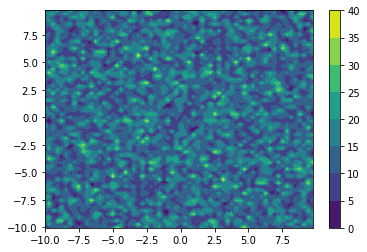

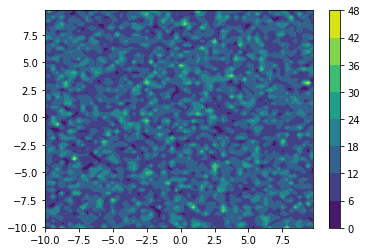

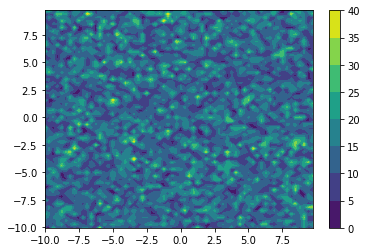

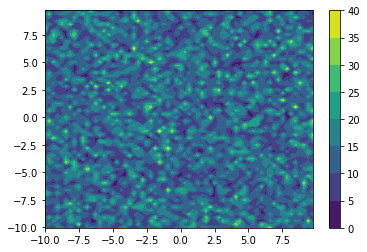

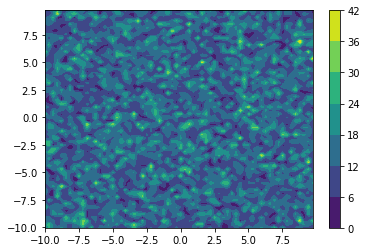

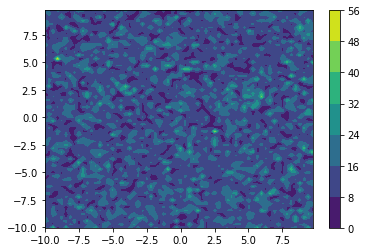

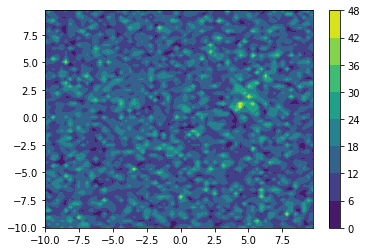

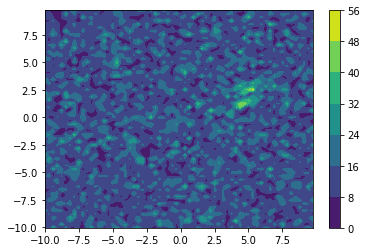

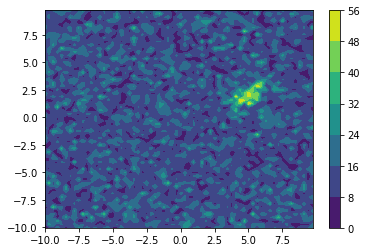

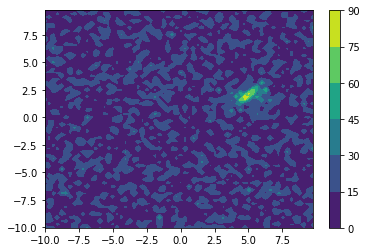

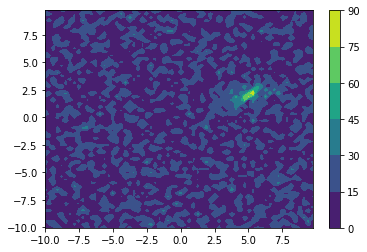

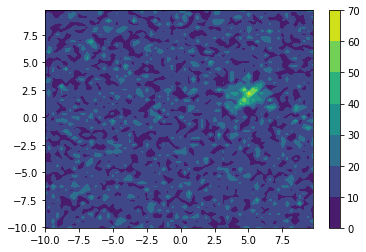

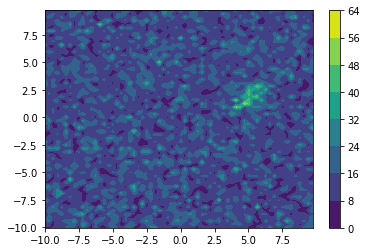

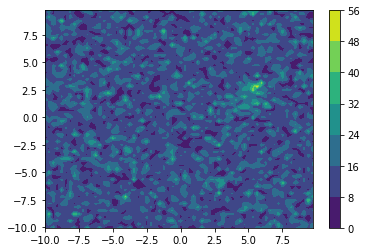

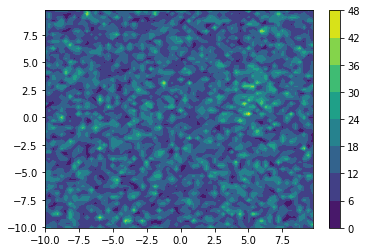

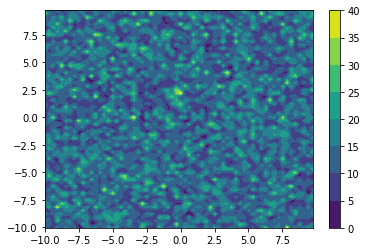

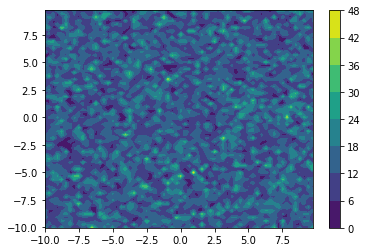

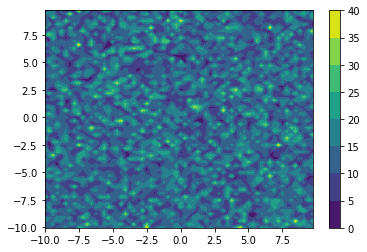

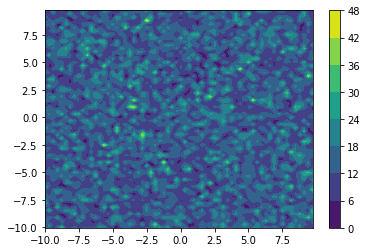

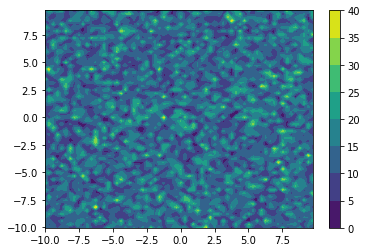

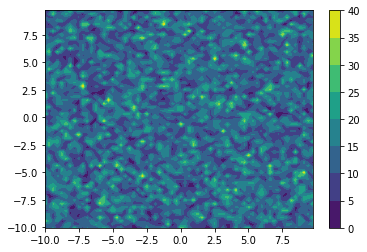

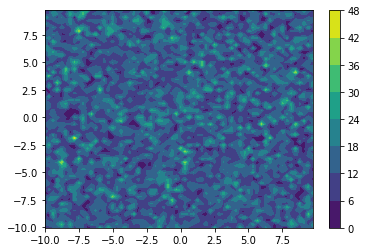

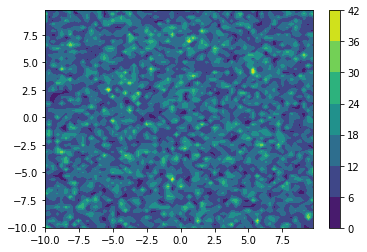

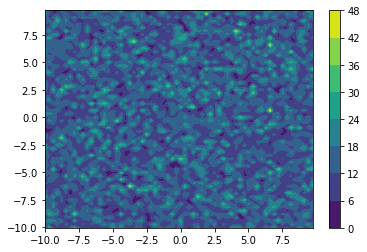

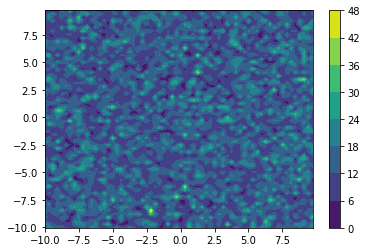

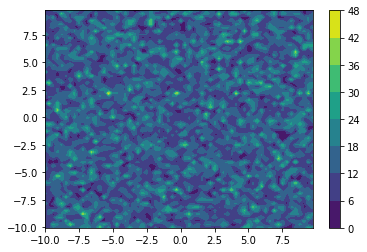

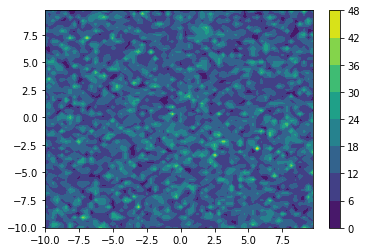

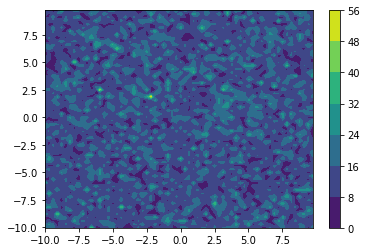

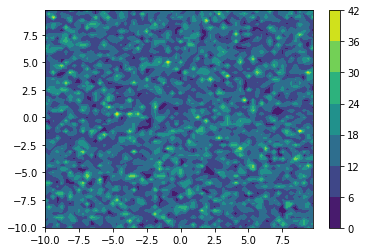

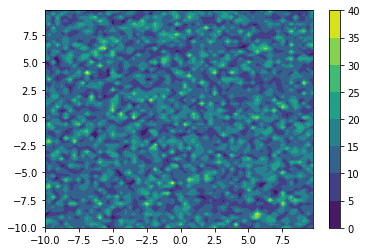

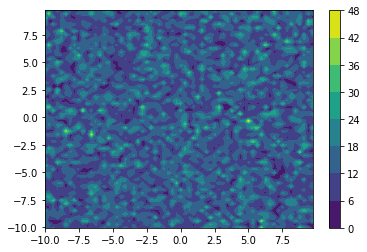

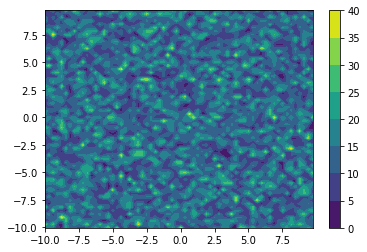

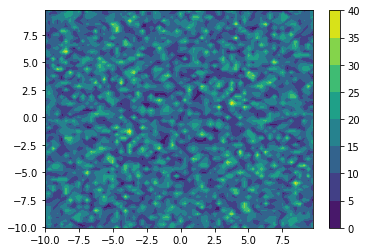

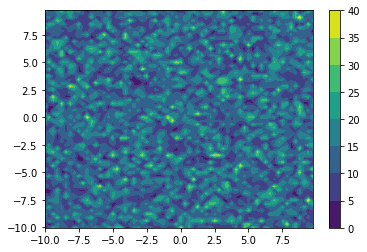

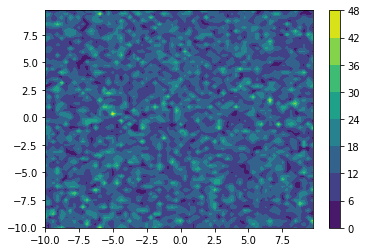

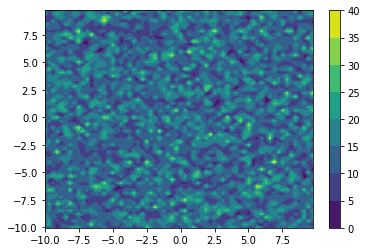

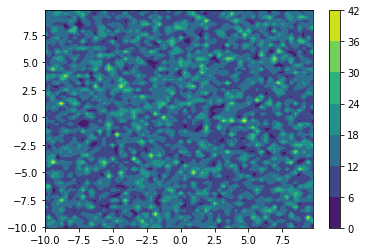

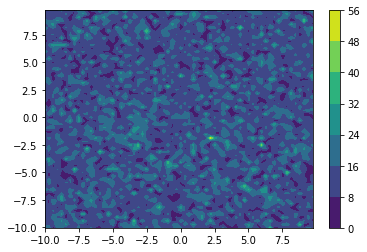

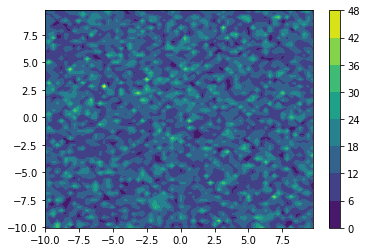

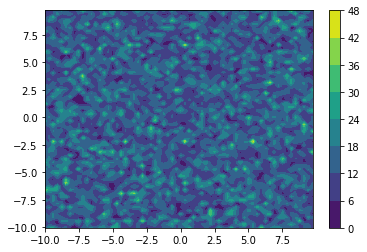

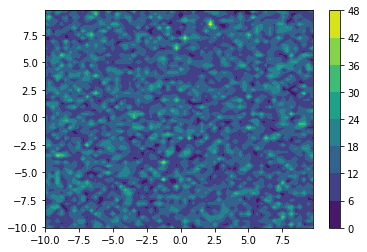

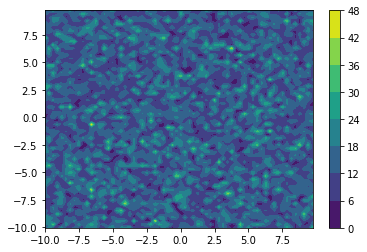

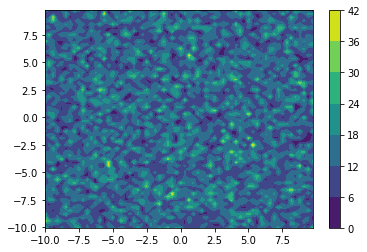

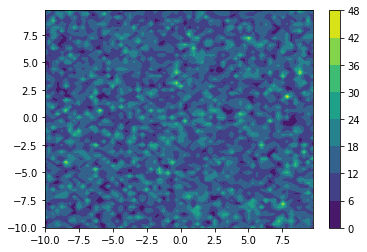

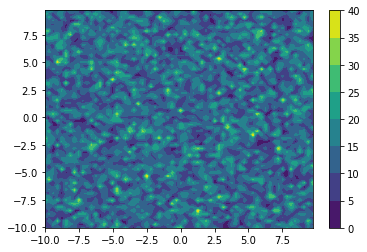

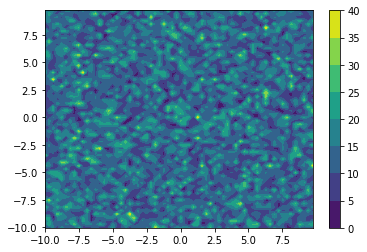

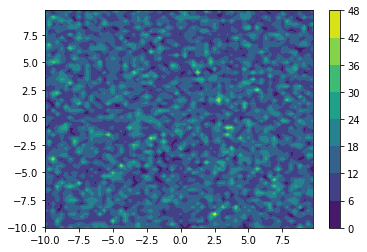

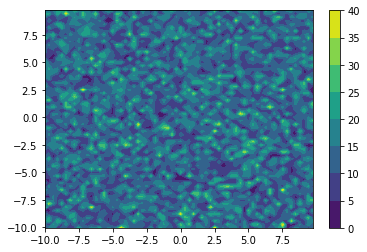

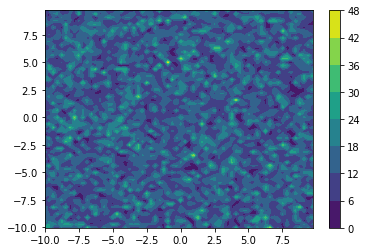

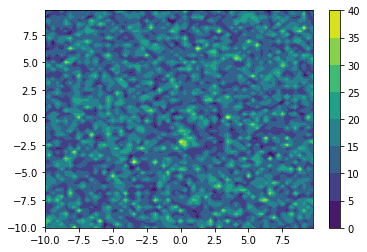

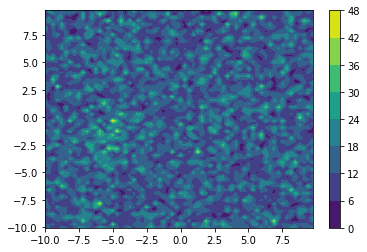

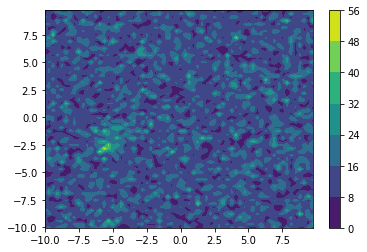

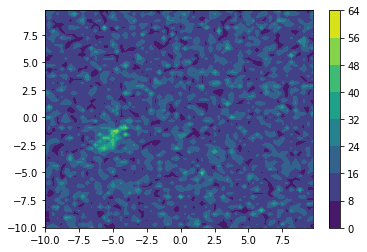

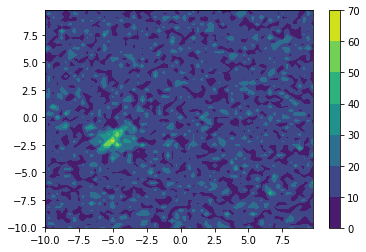

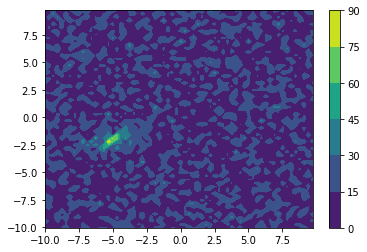

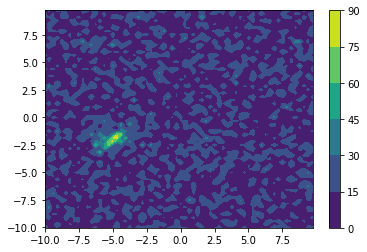

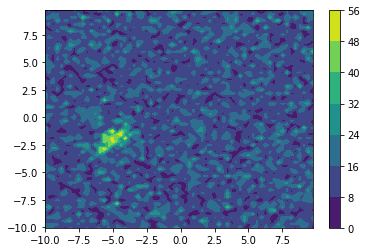

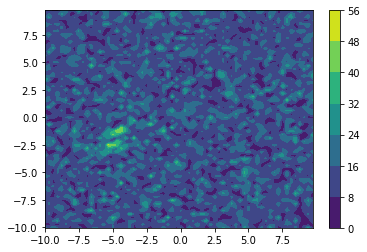

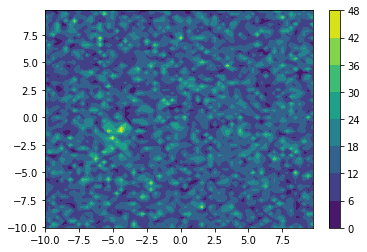

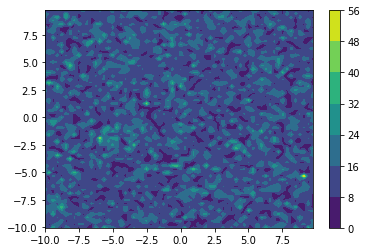

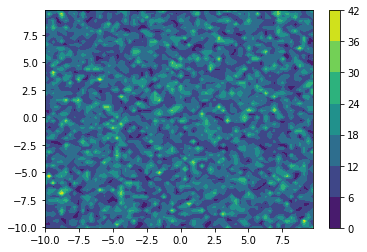

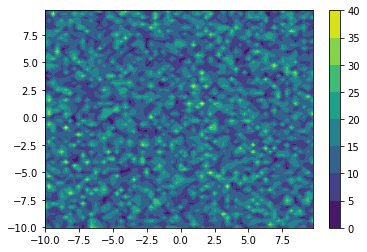

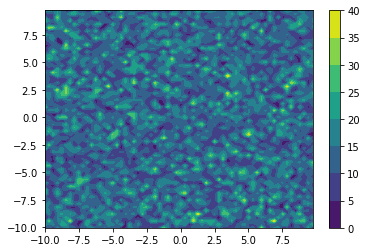

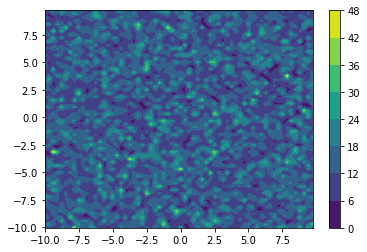

In [4]:
k1, k2 = np.meshgrid(K_grid, K_grid)
cont_levels = np.arange(0, 20, 0.5)
fig, ax = plt.subplots()
for i in range(64):
    im1 = plt.contourf(k1, k2, np.abs(fft_sum[:, :, i]))
    plt.colorbar(im1)
    plt.show()

Central Frequency seems to be around 90 (maximum of the frequency after taking the average over time)